In [82]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_columns', None)

DATA_PATH = os.path.join(os.environ['DEV_PATH'], 'datasets/LoL_esports')
LEAUGES = ['worlds', 'msi', 'lck', 'lpl', 'lec', 'lcs']

In [83]:
def feature_engineering(df):
    df['Outlier'] = df['GDPM'] * df['KPM']
    df['WinRate'] = df['Win'] / df['Games']
    return df

In [85]:
teams = pd.DataFrame()
for league in LEAUGES:
    temp = pd.read_csv(os.path.join(DATA_PATH, f'{league}_teams.csv'))
    teams = pd.concat([teams, temp])
teams = teams.reset_index(drop=True)
teams

,Team,OverviewPage,Games,Win,Loss,Gamelength Number,Gold,Kills,GPM,GDPM,KPM,Winner
0,Alliance,2014 Season World Championship,6,3,3,38.944444,62333.333333,12.833333,1602.455525,54.171227,0.333852,0
1,Cloud9,2014 Season World Championship,11,5,6,36.703030,59309.090909,12.909091,1619.407814,-43.437182,0.359875,0
2,Dark Passage,2014 Season World Championship,6,0,6,29.963889,38266.666667,3.333333,1256.519169,-655.515401,0.105509,0
3,EDward Gaming,2014 Season World Championship,12,6,6,36.202778,60608.333333,16.250000,1689.679321,115.783175,0.469209,0
4,Fnatic,2014 Season World Championship,6,2,4,44.719444,68766.666667,12.833333,1548.274383,-44.909069,0.296168,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,FlyQuest,LCS/2022 Season/Summer,28,13,15,32.797024,57443.107143,10.857143,1750.365301,-52.878561,0.332861,0
991,Golden Guardians,LCS/2022 Season/Summer,23,7,16,33.398551,56905.347826,10.217391,1704.366485,-135.988776,0.304961,0
992,Immortals,LCS/2022 Season/Summer,18,4,14,33.786111,55988.555556,7.111111,1648.453450,-199.842461,0.202425,0
993,TSM,LCS/2022 Season/Summer,28,11,17,32.385119,56200.392857,10.607143,1731.685036,-99.581410,0.324613,0


In [86]:
teams = feature_engineering(teams)
teams

,Team,OverviewPage,Games,Win,Loss,Gamelength Number,Gold,Kills,GPM,GDPM,KPM,Winner,Outlier,WinRate
0,Alliance,2014 Season World Championship,6,3,3,38.944444,62333.333333,12.833333,1602.455525,54.171227,0.333852,0,18.085199,0.500000
1,Cloud9,2014 Season World Championship,11,5,6,36.703030,59309.090909,12.909091,1619.407814,-43.437182,0.359875,0,-15.631955,0.454545
2,Dark Passage,2014 Season World Championship,6,0,6,29.963889,38266.666667,3.333333,1256.519169,-655.515401,0.105509,0,-69.162760,0.000000
3,EDward Gaming,2014 Season World Championship,12,6,6,36.202778,60608.333333,16.250000,1689.679321,115.783175,0.469209,0,54.326516,0.500000
4,Fnatic,2014 Season World Championship,6,2,4,44.719444,68766.666667,12.833333,1548.274383,-44.909069,0.296168,0,-13.300614,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,FlyQuest,LCS/2022 Season/Summer,28,13,15,32.797024,57443.107143,10.857143,1750.365301,-52.878561,0.332861,0,-17.601218,0.464286
991,Golden Guardians,LCS/2022 Season/Summer,23,7,16,33.398551,56905.347826,10.217391,1704.366485,-135.988776,0.304961,0,-41.471283,0.304348
992,Immortals,LCS/2022 Season/Summer,18,4,14,33.786111,55988.555556,7.111111,1648.453450,-199.842461,0.202425,0,-40.453141,0.222222
993,TSM,LCS/2022 Season/Summer,28,11,17,32.385119,56200.392857,10.607143,1731.685036,-99.581410,0.324613,0,-32.325438,0.392857


In [109]:
columns = ['Games', 'WinRate', 'Gamelength Number', 'GPM', 'GDPM', 'KPM', 'Outlier']
X = teams[columns]
y = teams['Winner']

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, stratify=y, random_state=0
)

X_trainval.shape, y_trainval.shape, X_test.shape, y_test.shape

((746, 7), (746,), (249, 7), (249,))

In [110]:
fold = RepeatedStratifiedKFold(random_state=0)

In [111]:
model = RandomForestClassifier(random_state=0)
scores = cross_val_score(model, X_trainval, y_trainval, scoring='roc_auc', cv=fold, n_jobs=-1)
scores.mean()

0.9476735916151974

In [112]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(random_state=0))])
scores = cross_val_score(pipe, X_trainval, y_trainval, cv=fold, scoring='roc_auc', n_jobs=-1)
scores.mean()

0.95842206955775

In [113]:
model = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(model, X_trainval, y_trainval, scoring='roc_auc', cv=fold, n_jobs=-1)
scores.mean()

0.9492386685162555

In [114]:
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search = GridSearchCV(pipe, param_grid, cv=fold, return_train_score=True, n_jobs=-1, scoring='roc_auc')

In [115]:
grid_search.fit(X_trainval, y_trainval)

c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__solver': ['lbfgs', 'liblinear', 'sag',
                                           'saga']},
             return_train_score=True, scoring='roc_auc')

In [116]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'model__C': 10, 'model__solver': 'saga'}
0.9592233653708536


In [117]:
results = pd.DataFrame(grid_search.cv_results_)

<AxesSubplot:>

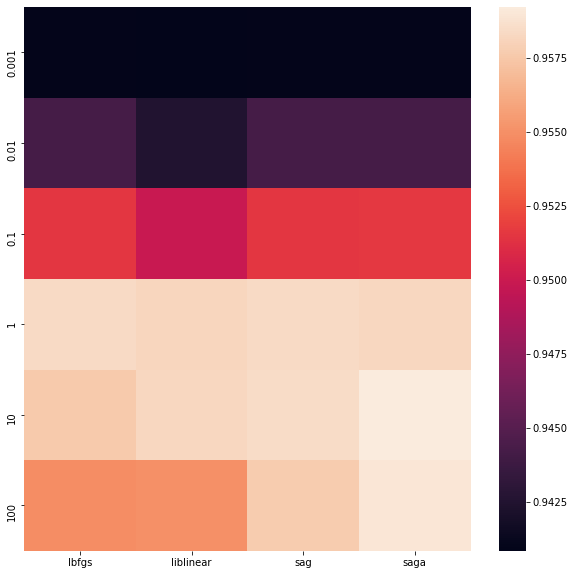

In [118]:
scores = np.array(results.mean_test_score).reshape(6, 4)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(
    scores,
    xticklabels=['lbfgs', 'liblinear', 'sag', 'saga'],
    yticklabels=[0.001, 0.01, 0.1, 1, 10, 100]
)

In [119]:
logreg = LogisticRegression(C=10, solver='saga', random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', logreg)])
pipe.fit(X_trainval, y_trainval)
pipe.score(X_trainval, y_trainval)

c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.9477211796246648

In [120]:
pipe.score(X_test, y_test)

0.9558232931726908

In [121]:
feature_importance = pd.DataFrame(data=np.abs(pipe['logreg'].coef_), columns=columns)
feature_importance

,Games,WinRate,Gamelength Number,GPM,GDPM,KPM,Outlier
0,0.301585,4.370907,0.324101,0.118918,0.230476,0.54484,0.556849


<AxesSubplot:>

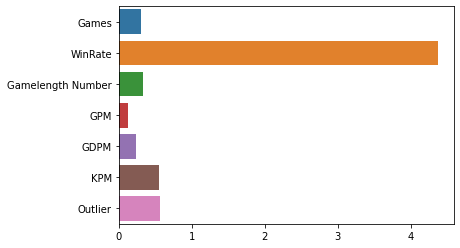

In [122]:
sns.barplot(x=feature_importance.values.reshape(-1), y=feature_importance.columns)

In [123]:
current_teams = pd.read_csv(os.path.join(DATA_PATH, '2022_worlds_teams.csv'))
current_teams = feature_engineering(current_teams)
current_teams

,Team,OverviewPage,Games,Win,Loss,Gamelength Number,Gold,Kills,GPM,GDPM,KPM,Winner,Outlier,WinRate
0,100 Thieves,2022 Season World Championship,6,1,5,30.744444,51503.500000,8.833333,1658.967000,-264.425651,0.277918,0,-73.488723,0.166667
1,Beyond Gaming,2022 Season World Championship,5,2,3,31.910000,55577.000000,13.200000,1759.656617,-49.327154,0.421208,0,-20.776985,0.400000
2,CTBC Flying Oyster,2022 Season World Championship,6,1,5,31.702778,53686.666667,8.000000,1687.232281,-289.991505,0.251952,0,-73.063983,0.166667
3,Chiefs Esports Club,2022 Season World Championship,5,0,5,28.090000,45513.400000,8.800000,1615.029105,-447.248290,0.308650,0,-138.043166,0.000000
4,Cloud9,2022 Season World Championship,6,1,5,27.200000,43550.833333,6.666667,1593.282676,-359.610370,0.245578,0,-88.312553,0.166667
5,DRX,2022 Season World Championship,12,10,2,30.027778,57866.750000,15.833333,1949.721642,303.200123,0.557903,0,169.156373,0.833333
6,DWG KIA,2022 Season World Championship,7,5,2,30.807143,58987.142857,16.714286,1928.366267,258.330185,0.557433,0,144.001847,0.714286
7,DetonatioN FocusMe,2022 Season World Championship,14,7,7,32.734524,58367.714286,13.857143,1778.528305,-56.988650,0.417505,0,-23.793058,0.500000
8,EDward Gaming,2022 Season World Championship,6,4,2,28.688889,54077.333333,14.166667,1877.509205,181.493502,0.487159,0,88.416266,0.666667
9,Evil Geniuses.NA,2022 Season World Championship,16,9,7,30.141667,54658.937500,14.125000,1817.281303,70.152790,0.475557,0,33.361683,0.562500


In [124]:
pred_y = pipe.predict_proba(current_teams[columns])
pred_y

array([[9.99999188e-01, 8.12360265e-07],
       [9.99651070e-01, 3.48929666e-04],
       [9.99999221e-01, 7.79059795e-07],
       [9.99999976e-01, 2.42892192e-08],
       [9.99999352e-01, 6.47550509e-07],
       [1.88189798e-01, 8.11810202e-01],
       [7.87857661e-01, 2.12142339e-01],
       [9.93905200e-01, 6.09479970e-03],
       [9.24947698e-01, 7.50523021e-02],
       [9.84572860e-01, 1.54271403e-02],
       [9.92295536e-01, 7.70446411e-03],
       [9.99998807e-01, 1.19259570e-06],
       [9.99998543e-01, 1.45736304e-06],
       [1.57208566e-01, 8.42791434e-01],
       [9.99999948e-01, 5.17018375e-08],
       [9.99993710e-01, 6.28967449e-06],
       [7.13694366e-02, 9.28630563e-01],
       [9.99346247e-01, 6.53753022e-04],
       [9.96395042e-01, 3.60495759e-03],
       [9.77601296e-01, 2.23987038e-02],
       [5.47878938e-01, 4.52121062e-01],
       [9.99928193e-01, 7.18065148e-05],
       [3.16068324e-01, 6.83931676e-01],
       [9.98330725e-01, 1.66927548e-03]])

In [125]:
current_teams['Win_prob'] = pred_y[:, 1]
current_teams = current_teams.sort_values(by='Win_prob', ascending=False)
current_teams

,Team,OverviewPage,Games,Win,Loss,Gamelength Number,Gold,Kills,GPM,GDPM,KPM,Winner,Outlier,WinRate,Win_prob
16,JD Gaming,2022 Season World Championship,7,6,1,31.126190,60858.285714,17.857143,1966.023817,241.913332,0.576427,0,139.445269,0.857143,9.286306e-01
13,Gen.G,2022 Season World Championship,7,6,1,28.842857,56134.428571,16.571429,1959.235787,335.239343,0.581482,0,194.935767,0.857143,8.427914e-01
5,DRX,2022 Season World Championship,12,10,2,30.027778,57866.750000,15.833333,1949.721642,303.200123,0.557903,0,169.156373,0.833333,8.118102e-01
22,T1,2022 Season World Championship,6,5,1,26.294444,51737.333333,16.333333,1977.824907,349.566468,0.633010,0,221.278896,0.833333,6.839317e-01
20,Royal Never Give Up,2022 Season World Championship,16,12,4,31.605208,61134.062500,16.250000,1942.954544,252.712102,0.527965,0,133.423214,0.750000,4.521211e-01
6,DWG KIA,2022 Season World Championship,7,5,2,30.807143,58987.142857,16.714286,1928.366267,258.330185,0.557433,0,144.001847,0.714286,2.121423e-01
8,EDward Gaming,2022 Season World Championship,6,4,2,28.688889,54077.333333,14.166667,1877.509205,181.493502,0.487159,0,88.416266,0.666667,7.505230e-02
19,Rogue (European Team),2022 Season World Championship,7,4,3,31.150000,55943.428571,12.571429,1778.276329,-48.978454,0.390659,0,-19.133873,0.571429,2.239870e-02
9,Evil Geniuses.NA,2022 Season World Championship,16,9,7,30.141667,54658.937500,14.125000,1817.281303,70.152790,0.475557,0,33.361683,0.562500,1.542714e-02
10,Fnatic,2022 Season World Championship,11,6,5,30.757576,55514.636364,12.090909,1801.984402,29.680603,0.388665,0,11.535802,0.545455,7.704464e-03


In [126]:
team_names = [
    'T1', 'EDward Gaming', 'JD Gaming', 'DWG KIA',
    'DRX', 'Rogue (European Team)', 'Gen.G', 'Royal Never Give Up'
]
target_teams = current_teams.loc[current_teams['Team'].isin(team_names)]
target_teams

,Team,OverviewPage,Games,Win,Loss,Gamelength Number,Gold,Kills,GPM,GDPM,KPM,Winner,Outlier,WinRate,Win_prob
16,JD Gaming,2022 Season World Championship,7,6,1,31.126190,60858.285714,17.857143,1966.023817,241.913332,0.576427,0,139.445269,0.857143,0.928631
13,Gen.G,2022 Season World Championship,7,6,1,28.842857,56134.428571,16.571429,1959.235787,335.239343,0.581482,0,194.935767,0.857143,0.842791
5,DRX,2022 Season World Championship,12,10,2,30.027778,57866.750000,15.833333,1949.721642,303.200123,0.557903,0,169.156373,0.833333,0.811810
22,T1,2022 Season World Championship,6,5,1,26.294444,51737.333333,16.333333,1977.824907,349.566468,0.633010,0,221.278896,0.833333,0.683932
20,Royal Never Give Up,2022 Season World Championship,16,12,4,31.605208,61134.062500,16.250000,1942.954544,252.712102,0.527965,0,133.423214,0.750000,0.452121
6,DWG KIA,2022 Season World Championship,7,5,2,30.807143,58987.142857,16.714286,1928.366267,258.330185,0.557433,0,144.001847,0.714286,0.212142
8,EDward Gaming,2022 Season World Championship,6,4,2,28.688889,54077.333333,14.166667,1877.509205,181.493502,0.487159,0,88.416266,0.666667,0.075052
19,Rogue (European Team),2022 Season World Championship,7,4,3,31.150000,55943.428571,12.571429,1778.276329,-48.978454,0.390659,0,-19.133873,0.571429,0.022399
